In [1]:
!pip install psycopg2


In [2]:
import psycopg2
import pandas as pd

In [3]:
params = {
    "host": "localhost",
    "user": "postgres",
    "port": 5432,
    "password": "1234" 
}
connection = psycopg2.connect(**params, dbname= "firstdata")

In [4]:
df= pd.read_sql("select * from firstschema.surveylungcancer", connection)

C:\Users\Esra SOYLU\AppData\Local\Temp\ipykernel_18868\2964404100.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df= pd.read_sql("select * from firstschema.surveylungcancer", connection)


In [5]:
df

,gender,age_years,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,...,chest_pain,lung_cancer,age,CHRONIC DISEASE,FATIGUE,ALLERGY,ALCOHOL CONSUMING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,M,None,1,2,2,1,None,None,None,2,...,None,YES,69,1,2,1,2,2,2,2
1,M,None,2,1,1,1,None,None,None,1,...,None,YES,74,2,2,2,1,2,2,2
2,F,None,1,1,1,2,None,None,None,2,...,None,NO,59,1,2,1,1,2,1,2
3,M,None,2,2,2,1,None,None,None,1,...,None,NO,63,1,1,1,2,1,2,2
4,F,None,1,2,1,1,None,None,None,2,...,None,NO,63,1,1,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,None,1,1,1,2,None,None,None,1,...,None,YES,56,2,2,1,2,2,2,1
305,M,None,2,1,1,1,None,None,None,2,...,None,YES,70,1,2,2,2,2,1,2
306,M,None,2,1,1,1,None,None,None,2,...,None,YES,58,1,1,2,2,1,1,2
307,M,None,2,1,2,1,None,None,None,1,...,None,YES,67,1,2,2,2,2,1,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 309 non-null    object
 1   age_years              0 non-null      object
 2   smoking                309 non-null    int64 
 3   yellow_fingers         309 non-null    int64 
 4   anxiety                309 non-null    int64 
 5   peer_pressure          309 non-null    int64 
 6   chronic_disease        0 non-null      object
 7   fatigue                0 non-null      object
 8   allergy                0 non-null      object
 9   wheezing               309 non-null    int64 
 10  alcohol_consuming      0 non-null      object
 11  coughing               309 non-null    int64 
 12  shortness_breath       0 non-null      object
 13  swallowing_difficulty  0 non-null      object
 14  chest_pain             0 non-null      object
 15  lung_cancer            

In [7]:
columns_to_drop = ['age_years', 'chronic_disease', 'fatigue', 'allergy', 'alcohol_consuming', 'shortness_breath', 'swallowing_difficulty', 'chest_pain']

df = df.drop(columns=columns_to_drop, axis=1)


In [8]:
df

,gender,smoking,yellow_fingers,anxiety,peer_pressure,wheezing,coughing,lung_cancer,age,CHRONIC DISEASE,FATIGUE,ALLERGY,ALCOHOL CONSUMING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,M,1,2,2,1,2,2,YES,69,1,2,1,2,2,2,2
1,M,2,1,1,1,1,1,YES,74,2,2,2,1,2,2,2
2,F,1,1,1,2,2,2,NO,59,1,2,1,1,2,1,2
3,M,2,2,2,1,1,1,NO,63,1,1,1,2,1,2,2
4,F,1,2,1,1,2,2,NO,63,1,1,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,1,1,1,2,1,2,YES,56,2,2,1,2,2,2,1
305,M,2,1,1,1,2,2,YES,70,1,2,2,2,2,1,2
306,M,2,1,1,1,2,2,YES,58,1,1,2,2,1,1,2
307,M,2,1,2,1,1,2,YES,67,1,2,2,2,2,1,2


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

In [10]:
df

,gender,smoking,yellow_fingers,anxiety,peer_pressure,wheezing,coughing,lung_cancer,age,CHRONIC DISEASE,FATIGUE,ALLERGY,ALCOHOL CONSUMING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,1,2,2,1,2,2,YES,69,1,2,1,2,2,2,2
1,1,2,1,1,1,1,1,YES,74,2,2,2,1,2,2,2
2,0,1,1,1,2,2,2,NO,59,1,2,1,1,2,1,2
3,1,2,2,2,1,1,1,NO,63,1,1,1,2,1,2,2
4,0,1,2,1,1,2,2,NO,63,1,1,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,1,1,1,2,1,2,YES,56,2,2,1,2,2,2,1
305,1,2,1,1,1,2,2,YES,70,1,2,2,2,2,1,2
306,1,2,1,1,1,2,2,YES,58,1,1,2,2,1,1,2
307,1,2,1,2,1,1,2,YES,67,1,2,2,2,2,1,2


In [11]:
df['lung_cancer'] = label_encoder.fit_transform(df['lung_cancer'])

In [12]:
df = df[[col for col in df if col != 'lung_cancer'] + ['lung_cancer']]


In [13]:
df

,gender,smoking,yellow_fingers,anxiety,peer_pressure,wheezing,coughing,age,CHRONIC DISEASE,FATIGUE,ALLERGY,ALCOHOL CONSUMING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,lung_cancer
0,1,1,2,2,1,2,2,69,1,2,1,2,2,2,2,1
1,1,2,1,1,1,1,1,74,2,2,2,1,2,2,2,1
2,0,1,1,1,2,2,2,59,1,2,1,1,2,1,2,0
3,1,2,2,2,1,1,1,63,1,1,1,2,1,2,2,0
4,0,1,2,1,1,2,2,63,1,1,1,1,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,1,1,1,2,1,2,56,2,2,1,2,2,2,1,1
305,1,2,1,1,1,2,2,70,1,2,2,2,2,1,2,1
306,1,2,1,1,1,2,2,58,1,1,2,2,1,1,2,1
307,1,2,1,2,1,1,2,67,1,2,2,2,2,1,2,1


In [33]:
df.to_csv('lungcanver.csv', index=False)


In [14]:
cancer = df[df.age > 30]

In [15]:
cancer_without_age = df.drop(["age"], axis = 1)
for i in cancer_without_age.columns: 
    print(cancer_without_age[i].value_counts())

1    162
0    147
Name: gender, dtype: int64
2    174
1    135
Name: smoking, dtype: int64
2    176
1    133
Name: yellow_fingers, dtype: int64
1    155
2    154
Name: anxiety, dtype: int64
2    155
1    154
Name: peer_pressure, dtype: int64
2    172
1    137
Name: wheezing, dtype: int64
2    179
1    130
Name: coughing, dtype: int64
2    156
1    153
Name: CHRONIC DISEASE, dtype: int64
2    208
1    101
Name: FATIGUE , dtype: int64
2    172
1    137
Name: ALLERGY , dtype: int64
2    172
1    137
Name: ALCOHOL CONSUMING, dtype: int64
2    198
1    111
Name: SHORTNESS OF BREATH, dtype: int64
1    164
2    145
Name: SWALLOWING DIFFICULTY, dtype: int64
2    172
1    137
Name: CHEST PAIN, dtype: int64
1    270
0     39
Name: lung_cancer, dtype: int64


In [16]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [17]:
df['lung_cancer'].value_counts()

1    270
0     39
Name: lung_cancer, dtype: int64

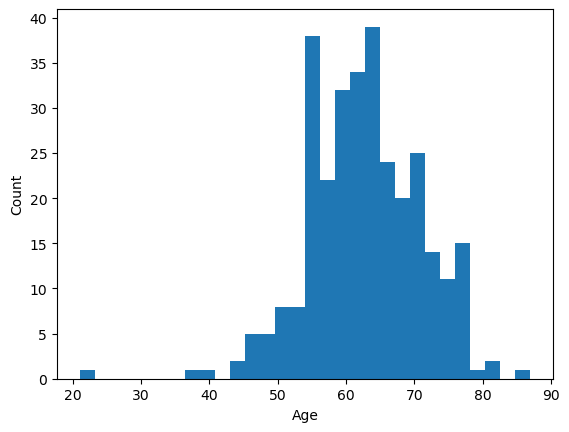

In [18]:
plt.hist(df["age"], bins = 30)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

<Axes: >

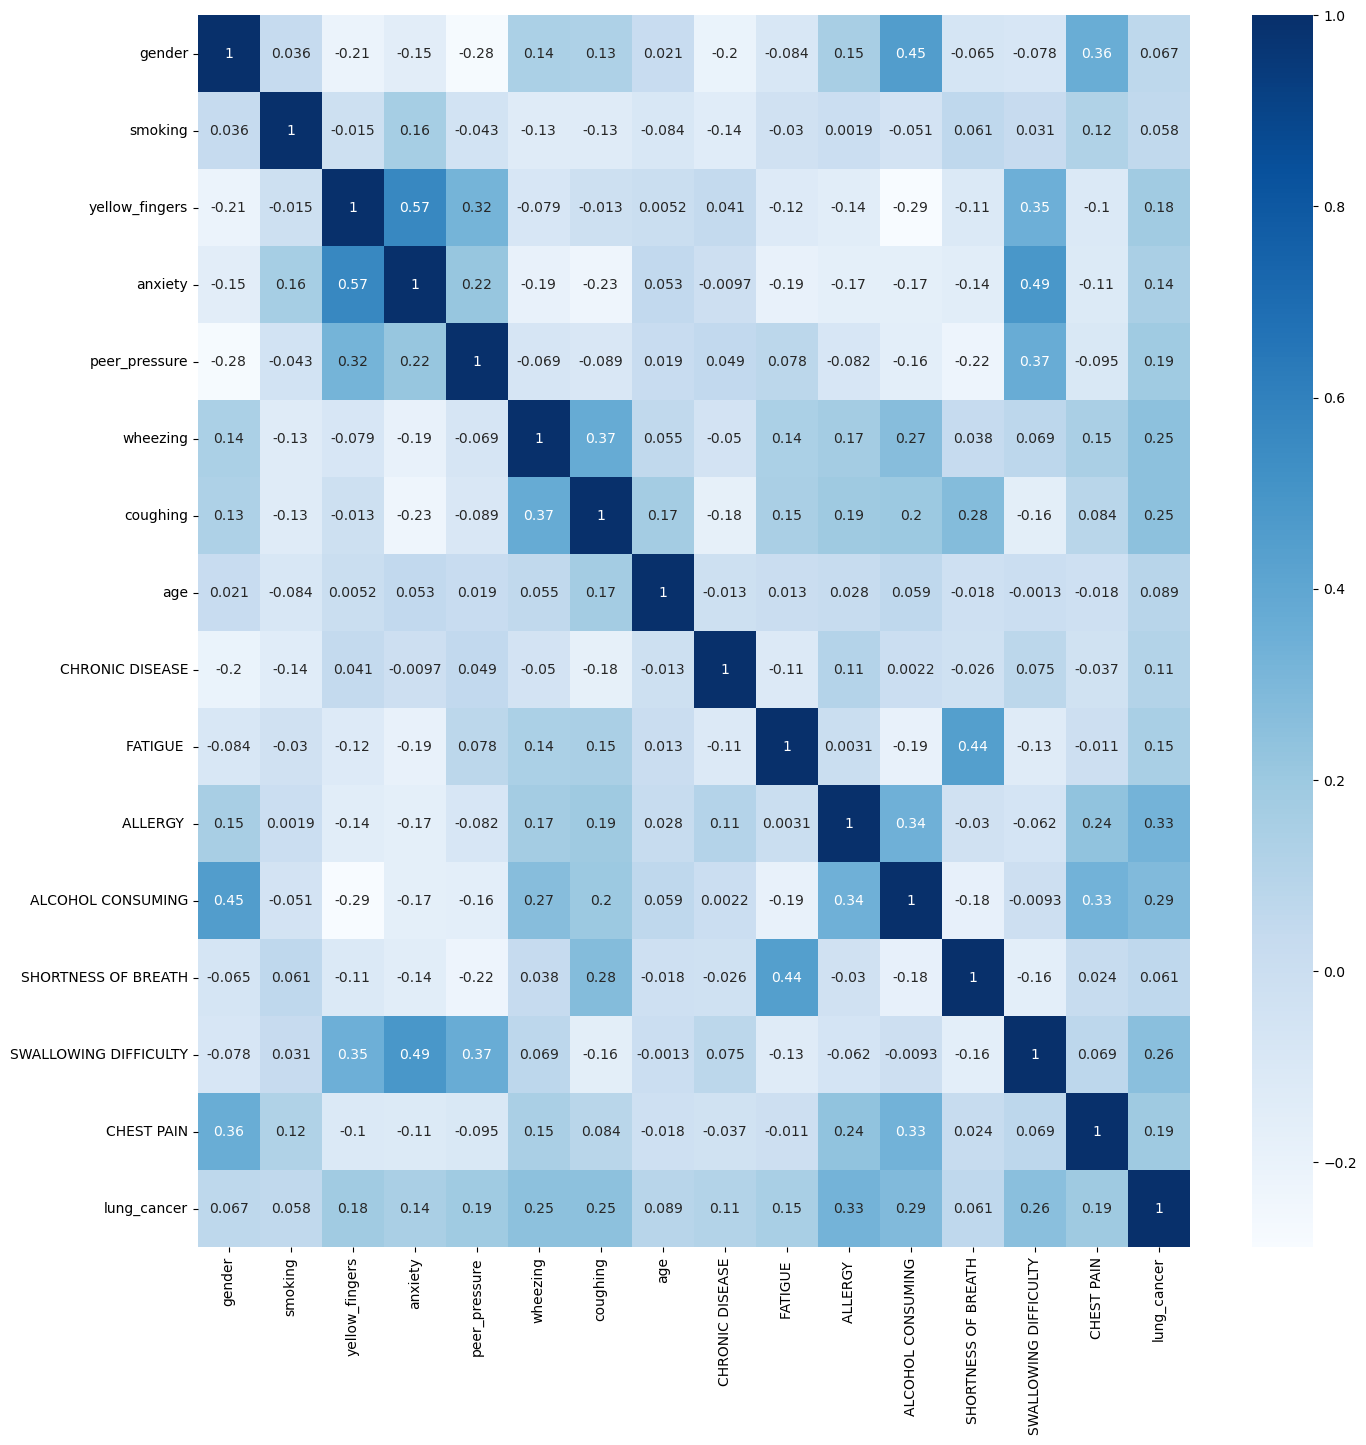

In [19]:
plt.figure(figsize = (16,16))
sns.heatmap(df.corr(), annot = True, cmap = "Blues")

In [20]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [21]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('lung_cancer', axis = 1), df['lung_cancer'], test_size = 0.3)

In [22]:
rf = RandomForestClassifier()

acc_rf = cross_val_score(rf, x_train, y_train, cv=5, scoring='accuracy')
acc_rf

array([0.88636364, 0.93023256, 0.86046512, 0.90697674, 0.93023256])

In [23]:
dt = DecisionTreeClassifier() 

acc_dt = cross_val_score(dt, x_train, y_train, cv=5, scoring='accuracy')
acc_dt

array([0.84090909, 0.90697674, 0.8372093 , 0.88372093, 0.86046512])

In [24]:
xgboost = XGBClassifier()

acc_xgboost = cross_val_score(xgboost, x_train, y_train, cv=5, scoring='accuracy')
acc_xgboost

array([0.88636364, 0.90697674, 0.8372093 , 0.93023256, 0.90697674])

In [25]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

x_train_scaled = std_scale.fit_transform(x_train)
x_test_scaled = std_scale.transform(x_test)


In [34]:
logreg = LogisticRegression(solver='liblinear')

acc_logreg = cross_val_score(logreg, x_train_scaled, y_train, cv=5, scoring='accuracy')
acc_logreg

logreg.fit(x_train_scaled, y_train)

LogisticRegression(solver='liblinear')

In [36]:
from joblib import dump, load

# Modeli pickle kullanarak kaydetme
dump(logreg, 'logreg2_model.pkl')

['logreg2_model.pkl']

In [28]:
perceptron = Perceptron()

acc_perc = cross_val_score(perceptron, x_train_scaled, y_train, cv=6, scoring='accuracy')
acc_perc

array([0.83333333, 0.91666667, 0.94444444, 0.88888889, 0.88888889,
       0.80555556])

In [29]:
svc = SVC()

acc_svc = cross_val_score(svc, x_train_scaled, y_train, cv=6, scoring='accuracy')
acc_svc

array([0.86111111, 0.91666667, 0.91666667, 0.88888889, 0.88888889,
       0.88888889])

In [30]:
knn = KNeighborsClassifier()

acc_knn = cross_val_score(knn, x_train_scaled, y_train, cv=6, scoring='accuracy')
acc_knn

array([0.86111111, 0.91666667, 0.88888889, 0.88888889, 0.94444444,
       0.91666667])

In [31]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'XGBoost',
              'Logistic Regression', 'KNN', 'Perceptron', 'SVC'],
    'Cross Validated Score (Mean)': [acc_rf.mean(), acc_dt.mean(), acc_xgboost.mean(), acc_logreg.mean(),
                                     acc_knn.mean(), acc_perc.mean(), acc_svc.mean()],
    'Cross Validated Score (Std)': [acc_rf.std(), acc_dt.std(), acc_xgboost.std(), acc_logreg.std(),
                                    acc_knn.std(), acc_perc.std(), acc_svc.std()]})

result_df = results.sort_values(by='Cross Validated Score (Mean)', ascending=False)
result_df = result_df.set_index('Model')
result_df['Cross Validated Score (Mean)'] = (result_df['Cross Validated Score (Mean)']*100).round(2)
result_df['Cross Validated Score (Std)'] = (result_df['Cross Validated Score (Std)']*100).round(2)
result_df

,Cross Validated Score (Mean),Cross Validated Score (Std)
Model,,
Logistic Regression,91.68,3.73
Random Forest,90.29,2.68
KNN,90.28,2.66
XGBoost,89.36,3.14
SVC,89.35,1.91
Perceptron,87.96,4.72
Decision Tree,86.59,2.64
